<a href="https://colab.research.google.com/github/mercy-git/ButterflyImagesClassification/blob/main/ClassificationOfButterflyImagesUsingDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Butterfly Images using Deep Learning






## Project Description

Build a Convolution Neural Network to classify 6 different species of Butterfly images.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from zipfile import ZipFile
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense,Convolution2D,MaxPooling2D,RandomContrast,RandomFlip,RandomTranslation,BatchNormalization,GlobalMaxPooling2D
# from keras import backend as K 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import keras
from tqdm import tqdm
from warnings import filterwarnings
filterwarnings('ignore')
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Read the Data

In [ ]:
# list the folders in the directory
os.chdir('/content/drive/My Drive/DL/Butterflies_classification_dataset/train/')
os.listdir()

['zebra long wing',
 'sootywing',
 'metalmark',
 'indra swallow',
 'gold banded',
 'copper tail']

(227, 230, 3)


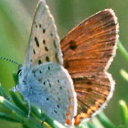

In [ ]:
# read the image
train_dir = '/content/drive/My Drive/DL/Butterflies_classification_dataset/train/'
image = cv2.imread(train_dir+'copper tail/000.jpg')
print(image.shape)
image = cv2.resize(image,(128,128))
cv2_imshow(image)

In [ ]:
def load_train():
  x_train = []
  y_train = []

  # iterate through each butterfly species directory
  for i in tqdm(os.listdir()):
    if (os.path.isdir(i)): 
      print('\nStart:{}'.format(i))
      print("Count of images in species {} is {}".format(i, len(os.listdir(i))))
      # iterate through each image in the butterfly species directory
      for j in os.listdir(i):
        try:
          # read the image
          image = cv2.imread(train_dir + i + "/" + j)
          # resize it
          image = cv2.resize(image, (128,128))
          x_train.append(image)
          y_train.append(i)
        # Handle the exception
        except Exception as e:
          print(e,i,j, len(x_train))
      print('\nEnd:{}'.format(i))

  print('Length of xtrain and ytrain: {} {} and image size is {}'.format(len(x_train),len(y_train),x_train[0].shape))
  return x_train,y_train

x_train,y_train = load_train()

  0%|          | 0/6 [00:00<?, ?it/s]


Start:zebra long wing
Count of images in species zebra long wing is 80


 17%|█▋        | 1/6 [00:29<02:29, 29.80s/it]


End:zebra long wing

Start:sootywing
Count of images in species sootywing is 80


 33%|███▎      | 2/6 [01:02<02:05, 31.28s/it]


End:sootywing

Start:metalmark
Count of images in species metalmark is 80


 50%|█████     | 3/6 [01:32<01:32, 30.72s/it]


End:metalmark

Start:indra swallow
Count of images in species indra swallow is 80


 67%|██████▋   | 4/6 [02:01<01:00, 30.22s/it]


End:indra swallow

Start:gold banded
Count of images in species gold banded is 80


 83%|████████▎ | 5/6 [02:27<00:28, 28.66s/it]


End:gold banded

Start:copper tail
Count of images in species copper tail is 80


100%|██████████| 6/6 [02:57<00:00, 29.54s/it]


End:copper tail
Length of xtrain and ytrain: 480 480 and image size is (128, 128, 3)


(415, 503, 3)
['copper tail', 'zebra long wing', 'metalmark', 'indra swallow', 'sootywing', 'gold banded']


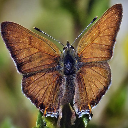

In [ ]:
test_dir = '/content/drive/My Drive/DL/Butterflies_classification_dataset/test/'
os.chdir(test_dir)
image = cv2.imread(test_dir+'/copper tail/080.jpg')
print(image.shape)
image = cv2.resize(image, (128,128))
print(os.listdir())
cv2_imshow(image)

In [ ]:
def load_test():
  x_test = []
  y_test = []

  for i in os.listdir():
      if (os.path.isdir(i)):  
        print('\nStart:{}'.format(i))
        print("Count of images in species {} is {}".format(i, len(os.listdir(i))))
        for j in os.listdir(i):
            try:
                image = cv2.imread(test_dir + i + "/" + j)
                image = cv2.resize(image, (128,128))
                x_test.append(image)
                y_test.append(i)
            except Exception as e:
                print(e, i, j)
        print('\nEnd:{}'.format(i))
  print('Length of xtest and ytest: {} {} and image size is {}'.format(len(x_test),len(y_test),x_test[0].shape))
  return x_test,y_test

x_test,y_test = load_test()


Start:copper tail
Count of images in species copper tail is 41

End:copper tail

Start:zebra long wing
Count of images in species zebra long wing is 18

End:zebra long wing

Start:metalmark
Count of images in species metalmark is 18

End:metalmark

Start:indra swallow
Count of images in species indra swallow is 24

End:indra swallow

Start:sootywing
Count of images in species sootywing is 36

End:sootywing

Start:gold banded
Count of images in species gold banded is 14

End:gold banded
Length of xtest and ytest: 151 151 and image size is (128, 128, 3)


In [ ]:
numpy_dir = '/content/drive/My Drive/DL/Butterflies_classification_dataset/numpy_dir/'

In [ ]:
os.chdir(numpy_dir)
np.save("x_train", x_train)
np.save("y_train", y_train)
np.save("x_test", x_test)
np.save("y_test", y_test)

In [ ]:
# load the training data
os.chdir(numpy_dir)
x_train = np.load('x_train.npy')
print(x_train.shape)
y_train = np.load('y_train.npy')
print(y_train.shape)
# load the test data
x_test = np.load('x_test.npy')
print(x_test.shape)
y_test = np.load('y_test.npy')
print(y_test.shape)

(480, 128, 128, 3)
(480,)
(151, 128, 128, 3)
(151,)


## Training and Validation split

In [ ]:
# target variable one hot encoding
y_train_en = np.array(pd.get_dummies(y_train))
y_test_en = np.array(pd.get_dummies(y_test))

# training and validation split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train_en, test_size=0.2, random_state=2)
print(x_tr.shape, x_val.shape, y_tr.shape, y_val.shape)

# scaling
x_tr = x_tr/255.
x_val = x_val/255.


(384, 128, 128, 3) (96, 128, 128, 3) (384, 6) (96, 6)


## Build a Basic model

### Conditions to satisfy

- Parameters should not cross 300000

- Should not use more than 4 layers (except input and output, including convolution and dense layers)

- Use Adam Optimizer

In [ ]:
inp_shape=(128,128,3)

In [ ]:
def build_model():
    model = Sequential()
    model.add(Convolution2D(filters=100, kernel_size=5, strides=1, activation='relu', input_shape=inp_shape)) # layer 1
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.30))
    model.add(Convolution2D(filters=80, kernel_size=5, strides=1, activation='relu')) # layer 2
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.30))
    model.add(Flatten())
    model.add(Dense(30, activation='relu')) # layer 3
    model.add(Dropout(0.30))
    model.add(Dense(6, activation='softmax')) 
    return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 124, 124, 100)     7600      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 100)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 100)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 80)        200080    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 80)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 80)         

* The figure indicates, 18-20 epoch could be a better choice, as the training and validation accuracy gets closer over there and after that though the training accuracy is increasing there is no increase in the validation accuracy which would be overfitting. 
* There is not much gap between the training curve and validation curve, hence overfitting is minimal.

In [ ]:
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
history = model.fit(x_tr, y_tr, epochs=12, verbose=1, validation_data=(x_val, y_val)) # 10 epochs 78 & 81, 20 epochs 90 & 89, 30 epochs 94 & 86, 40 epochs 97 & 87, 50 epochs 98 & 86

Epoch 1/12
12/12 [==============================] - 34s 3s/step - loss: 1.8195 - accuracy: 0.1823 - val_loss: 1.7629 - val_accuracy: 0.2500
Epoch 2/12
12/12 [==============================] - 24s 2s/step - loss: 1.7526 - accuracy: 0.2083 - val_loss: 1.7196 - val_accuracy: 0.2917
Epoch 3/12
12/12 [==============================] - 25s 2s/step - loss: 1.6783 - accuracy: 0.2760 - val_loss: 1.5596 - val_accuracy: 0.5208
Epoch 4/12
12/12 [==============================] - 26s 2s/step - loss: 1.5626 - accuracy: 0.3281 - val_loss: 1.5529 - val_accuracy: 0.2812
Epoch 5/12
12/12 [==============================] - 27s 2s/step - loss: 1.5198 - accuracy: 0.3464 - val_loss: 1.4282 - val_accuracy: 0.5312
Epoch 6/12
12/12 [==============================] - 23s 2s/step - loss: 1.3935 - accuracy: 0.3932 - val_loss: 1.1964 - val_accuracy: 0.6042
Epoch 7/12
12/12 [==============================] - 25s 2s/step - loss: 1.3050 - accuracy: 0.4219 - val_loss: 1.1402 - val_accuracy: 0.5833
Epoch 8/12
12/12 [==

## Model Evaluation

In [ ]:
# Basic Model Evaluation
score = model.evaluate(x_tr, y_tr, verbose = 0)
print("Training accuracy: {:.1%}".format(score[1]))
score = model.evaluate(x_val, y_val, verbose = 0)
print("Validation accuracy: {:.1%}".format(score[1]))
score = model.evaluate(x_test, y_test_en, verbose = 0)
print("Test accuracy: {:.1%}".format(score[1]))

Training accuracy: 81.0%
Validation accuracy: 76.0%
Test accuracy: 64.9%


Hence we have built a CNN Model to classify the chess images with the specified conditions. 

The total parameters used is 294296 which is < 300000.
Totally 3 layers are used as mentioned:
* 2 Convolution Layers
* 1 Dense Layer

We have used Adam optimizer which is the best optimizer for CNN. 

We have got the training accuracy as 89.3% , validation accuracy as 81.2% and test accuracy as 80.1% with 12 epochs. The overfitting is in acceptable range.

Note: Max Pool layers, Flatten layer and Dropout layers are not considered as layers because they don't have any trainable parameters associated with it.

## Build Advanced Model

Improve the baseline model performance by adding more filters to the Covolution Layer and saving the weights of the best model and apply early callback.

In [ ]:
def build_adv_model():
    model = Sequential()
    model.add(Convolution2D(filters=128, kernel_size=5, strides=1, activation='relu', input_shape=inp_shape)) # layer 1
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.30))
    model.add(Convolution2D(filters=128, kernel_size=5, strides=1, activation='relu')) # layer 2
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.30))
    model.add(Flatten())
    model.add(Dense(50, activation='relu')) # layer 3
    model.add(Dropout(0.30))
    model.add(Dense(6, activation='softmax')) 
    return model

model = build_adv_model()
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 124, 124, 128)     9728      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 dropout_102 (Dropout)       (None, 31, 31, 128)       0         
                                                                 
 conv2d_94 (Conv2D)          (None, 27, 27, 128)       409728    
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 dropout_103 (Dropout)       (None, 6, 6, 128)       

In [ ]:
adv_model = build_adv_model()
adv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
adv_model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 124, 124, 128)     9728      
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 dropout_105 (Dropout)       (None, 31, 31, 128)       0         
                                                                 
 conv2d_96 (Conv2D)          (None, 27, 27, 128)       409728    
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 dropout_106 (Dropout)       (None, 6, 6, 128)       

In [ ]:
adv_history = adv_model.fit(x_tr, y_tr, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
12/12 [==============================] - 35s 3s/step - loss: 1.8074 - accuracy: 0.1979 - val_loss: 1.6881 - val_accuracy: 0.3021
Epoch 2/10
12/12 [==============================] - 31s 3s/step - loss: 1.5975 - accuracy: 0.3307 - val_loss: 1.2898 - val_accuracy: 0.5938
Epoch 3/10
12/12 [==============================] - 32s 3s/step - loss: 1.2400 - accuracy: 0.5078 - val_loss: 0.9905 - val_accuracy: 0.6771
Epoch 4/10
12/12 [==============================] - 32s 3s/step - loss: 1.0942 - accuracy: 0.5781 - val_loss: 0.9283 - val_accuracy: 0.6354
Epoch 5/10
12/12 [==============================] - 31s 3s/step - loss: 0.9735 - accuracy: 0.6328 - val_loss: 0.7972 - val_accuracy: 0.7396
Epoch 6/10
12/12 [==============================] - 33s 3s/step - loss: 0.8895 - accuracy: 0.6849 - val_loss: 0.7573 - val_accuracy: 0.7292
Epoch 7/10
12/12 [==============================] - 30s 3s/step - loss: 0.7645 - accuracy: 0.7188 - val_loss: 0.7238 - val_accuracy: 0.7292
Epoch 8/10
12/12 [==

In [ ]:
# Adv Model Evaluation
score = adv_model.evaluate(x_tr, y_tr, verbose = 0 )
print("Training accuracy: {:.1%}".format(score[1]))
score = adv_model.evaluate(x_val, y_val, verbose = 0 )
print("Validation accuracy: {:.1%}".format(score[1]))
score = adv_model.evaluate(x_test, y_test_en, verbose = 0)
print("Test accuracy: {:.1%}".format(score[1]))

Training accuracy: 90.4%
Validation accuracy: 84.4%
Test accuracy: 73.5%


## Use Data Augmentation with the Advanced Model

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='reflect', cval=0.0, horizontal_flip=False,
    vertical_flip=False, rescale=None, preprocessing_function=None,
    data_format=None, validation_split=0.0, dtype=None
)

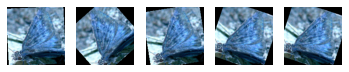

In [ ]:
# Create data augmentation object
data_augmentor = ImageDataGenerator(rotation_range=50, 
                                    width_shift_range=0.01, 
                                    height_shift_range=0.01,fill_mode='constant',cval=0.0)

# fit the training data
data_augmentor.fit(x_tr)
data_augmentor.fit(x_test)
data_augmentor.fit(x_val)

augment = data_augmentor.flow(x_tr[0:1], batch_size=1)

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(augment.next().squeeze())
    plt.axis('off')
plt.show()

In [ ]:
# prepare iterator
X_train_aug = data_augmentor.flow(x_tr, y_tr, batch_size=24)
adv_model = build_adv_model()
adv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
steps = int(x_tr.shape[0] / 24)
history_data_aug = adv_model.fit(X_train_aug, steps_per_epoch=steps, epochs=10, validation_data=(x_val, y_val), verbose=1)

Epoch 1/10
16/16 [==============================] - 34s 2s/step - loss: 1.8139 - accuracy: 0.1615 - val_loss: 1.7785 - val_accuracy: 0.2604
Epoch 2/10
16/16 [==============================] - 36s 2s/step - loss: 1.7622 - accuracy: 0.2318 - val_loss: 1.6709 - val_accuracy: 0.4479
Epoch 3/10
16/16 [==============================] - 33s 2s/step - loss: 1.6425 - accuracy: 0.3307 - val_loss: 1.6412 - val_accuracy: 0.2917
Epoch 4/10
16/16 [==============================] - 32s 2s/step - loss: 1.4840 - accuracy: 0.4115 - val_loss: 1.2260 - val_accuracy: 0.6458
Epoch 5/10
16/16 [==============================] - 32s 2s/step - loss: 1.3494 - accuracy: 0.5000 - val_loss: 1.1198 - val_accuracy: 0.6667
Epoch 6/10
16/16 [==============================] - 35s 2s/step - loss: 1.1732 - accuracy: 0.5469 - val_loss: 0.8093 - val_accuracy: 0.7188
Epoch 7/10
16/16 [==============================] - 32s 2s/step - loss: 1.1281 - accuracy: 0.5911 - val_loss: 0.9480 - val_accuracy: 0.6875
Epoch 8/10
16/16 [==

In [ ]:
# Adv Model Evaluation
score = adv_model.evaluate(x_tr, y_tr, verbose = 0 )
print("Training accuracy: {:.1%}".format(score[1]))
score = adv_model.evaluate(x_val, y_val, verbose = 0 )
print("Validation accuracy: {:.1%}".format(score[1]))
score = adv_model.evaluate(x_test, y_test_en, verbose = 0)
print("Test accuracy: {:.1%}".format(score[1]))

Training accuracy: 81.2%
Validation accuracy: 81.2%
Test accuracy: 77.5%


In [ ]:

def plot_performance(epochs, data, train_param, val_param, stop, step, plot_num):
    '''Plots the Accuracy vs Epochs and Loss Vs Epochs. Plots for both training and validation data'''
    plt.subplot(1,2,plot_num)
    plt.plot(epochs, data[train_param], 'g', label=f'Training ({train_param})')
    plt.plot(epochs, data[val_param], 'red', label=f'Validation ({val_param})')
    
    plt.title(train_param.title())
    plt.xlabel('Epochs')
    plt.xticks(np.arange(0,stop,step))
    plt.ylabel(train_param)
    
    plt.legend()
    plt.grid()
    

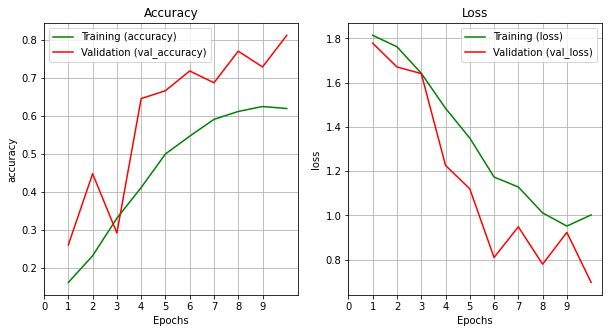

In [ ]:
history_dict = history_data_aug.history
epochs = range(1, len(history_dict['accuracy'])+1)
plt.figure(figsize=(10,5))
plot_performance(epochs, history_dict, 'accuracy', 'val_accuracy', 10, 1, 1)
plot_performance(epochs, history_dict, 'loss', 'val_loss', 10, 1, 2)
plt.show()

## Using Checkpoint & Early Stopping with the Advanced Model

In [ ]:
# optimizer = Adam(epsilon=0.001)
advan_model = build_adv_model()
advan_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
# Callback to save the Keras model or model weights at some frequency.
checkpoint_adv = ModelCheckpoint("/content/drive/My Drive/DL/Butterflies_classification_dataset/model/saved_model.h5", monitor='val_loss', verbose=1, 
                                 save_best_only=True, mode='auto')
early_adv = EarlyStopping(monitor='val_loss', 
                          min_delta=0.001, # minimium amount of change to count as an improvement
                          patience=3,  # how many epochs to wait before stopping
                          verbose=1, 
                          mode='auto',
                          restore_best_weights = True # restore the model weights from the epoch with the lowest validation loss
                         )

In [ ]:
adv_history = advan_model.fit(x_tr, y_tr, epochs=10, verbose=1, validation_data=(x_val, y_val), callbacks = [checkpoint_adv, early_adv])

Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 1.7929 - accuracy: 0.2135
Epoch 1: val_loss improved from inf to 1.68946, saving model to /content/drive/My Drive/DL/Butterflies_classification_dataset/model/saved_model.h5
12/12 [==============================] - 32s 3s/step - loss: 1.7929 - accuracy: 0.2135 - val_loss: 1.6895 - val_accuracy: 0.4271
Epoch 2/10
12/12 [==============================] - ETA: 0s - loss: 1.5907 - accuracy: 0.3698
Epoch 2: val_loss improved from 1.68946 to 1.26202, saving model to /content/drive/My Drive/DL/Butterflies_classification_dataset/model/saved_model.h5
12/12 [==============================] - 34s 3s/step - loss: 1.5907 - accuracy: 0.3698 - val_loss: 1.2620 - val_accuracy: 0.5833
Epoch 3/10
12/12 [==============================] - ETA: 0s - loss: 1.2086 - accuracy: 0.5130
Epoch 3: val_loss improved from 1.26202 to 0.94882, saving model to /content/drive/My Drive/DL/Butterflies_classification_dataset/model/saved_model.h5
12/12 [====

In [ ]:
score = advan_model.evaluate(x_tr, y_tr, verbose = 0 )
print("Training accuracy: ", score[1])
score = advan_model.evaluate(x_val, y_val, verbose = 0 )
print("Validation accuracy: ", score[1])
score = advan_model.evaluate(x_test, y_test_en, verbose = 0 )
print("Test accuracy: ", score[1])

Training accuracy:  0.9140625
Validation accuracy:  0.8541666865348816
Test accuracy:  0.8410596251487732


Hence we have built an advanced CNN model with 2 Convolution layers having 128 filters each and a dense layer layer having 50 hidden neurons. We have utilized 650212 parameters. We have used 10 epochs. We have also constructed the model using Checkpoint and Early stopping.

We have achieved a test accuracy of 84%.

## Using Data Augmentation & Checkpoint & Early stopping together on the Advanced Model.

In [ ]:
# optimizer = Adam(epsilon=0.001)
advance_model = build_adv_model()
advance_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
# Callback to save the Keras model or model weights at some frequency.
checkpoint_advan = ModelCheckpoint("/content/drive/My Drive/DL/Butterflies_classification_dataset/model/adv_model.h5", monitor='val_loss', verbose=1, save_best_only=True, 
                                 mode='auto')
early_advan = EarlyStopping(monitor='val_loss', 
                          min_delta=0.001, # minimium amount of change to count as an improvement
                          patience=3,  # how many epochs to wait before stopping
                          verbose=1, 
                          mode='auto',
                          restore_best_weights = True # restore the model weights from the epoch with the lowest validation loss
                         )

In [ ]:
advance_history = advance_model.fit(X_train_aug, epochs=10, verbose=1, validation_data=(x_val, y_val), callbacks = [checkpoint_advan, early_advan])

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 1.6717 - accuracy: 0.2943
Epoch 1: val_loss improved from inf to 1.49105, saving model to /content/drive/My Drive/DL/Butterflies_classification_dataset/model/adv_model.h5
16/16 [==============================] - 34s 2s/step - loss: 1.6717 - accuracy: 0.2943 - val_loss: 1.4911 - val_accuracy: 0.4167
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 1.4396 - accuracy: 0.4219
Epoch 2: val_loss improved from 1.49105 to 1.12938, saving model to /content/drive/My Drive/DL/Butterflies_classification_dataset/model/adv_model.h5
16/16 [==============================] - 34s 2s/step - loss: 1.4396 - accuracy: 0.4219 - val_loss: 1.1294 - val_accuracy: 0.6562
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 1.2350 - accuracy: 0.5260
Epoch 3: val_loss did not improve from 1.12938
16/16 [==============================] - 33s 2s/step - loss: 1.2350 - accuracy: 0.5260 - val_loss: 1.1829 - val_accurac

In [ ]:
score = advance_model.evaluate(x_tr, y_tr, verbose = 0 )
print("Training accuracy: ", score[1])
score = advance_model.evaluate(x_val, y_val, verbose = 0 )
print("Validation accuracy: ", score[1])
score = advance_model.evaluate(x_test, y_test_en, verbose = 0 )
print("Test accuracy: ", score[1])

Training accuracy:  0.8255208134651184
Validation accuracy:  0.8125
Test accuracy:  0.7748344540596008


- Build a Basic Model - 64.9% Test Accuracy
- Build Advanced Model - 73.5% Test Accuracy
- Use Data Augmentation with the Advanced Model - 77.5% Test Accuracy
- Using Checkpoint & Early Stopping with the Advanced Model - 84% Test Accuracy
- Using Data Augmentation & Checkpoint & Early stopping together with the Advanced Model - 77.5% Test Accuracy

Building the Advanced Model with Checkpoint & early stopping has given the best test accuracy of 84%, hence we choose the same.